<a href="https://colab.research.google.com/github/BKN1810/DeepLearning/blob/master/pneumoniaUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install the dependencies
!pip install kaggle 

In [ ]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"52edf00e3d771704d70e964051fff001"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d balnyaupane/pneumonia-chest-xray-dataset-200-by-200-image -p /content

 96% 161M/168M [00:02<00:00, 64.5MB/s]
100% 168M/168M [00:02<00:00, 59.3MB/s]


In [ ]:
!unzip -uq "/content/pneumonia-chest-xray-dataset-200-by-200-image.zip" -d "/content/Dataset"

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

Using TensorFlow backend.


In [ ]:
classifier = Sequential()

#step1-convolution
# classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Convolution2D(filters=64, kernel_size=(3,3), strides=(1,1),input_shape=(200,200,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.1))

#adding second Convolution layer
classifier.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(1,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))

#adding Third Convolution layer
classifier.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(2,2),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

#step3-flattening
classifier.add(Flatten())

#step4-full connection
classifier.add(Dense(activation='relu',units=64))
classifier.add(Dropout(0.5))

classifier.add(Dense(activation='relu',units=32))

classifier.add(Dense(activation='sigmoid',units=1))

In [ ]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/train',
        target_size=(200, 200),
        batch_size=64,
        color_mode='grayscale',
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/test',
        target_size=(200, 200),
        batch_size=64,
        color_mode='grayscale',
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

# summarize model.
classifier.summary()

Found 10432 images belonging to 2 classes.
training_set.class_indices:    {'normal': 0, 'pneumonia': 1}
Found 1248 images belonging to 2 classes.
test_set.class_indices:    {'Normal': 0, 'pneumonia': 1}
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 198, 198, 128)     1280      
_________________________________________________________________
batch_normalization_8 (Batch (None, 198, 198, 128)     512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 99, 99, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 97, 97, 256)       295168    
_________________________________________________

In [ ]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=326,
        epochs=50,
        validation_data=test_set,
        validation_steps=39)

Epoch 1/50
326/326 [==============================] - 260s 796ms/step - loss: 0.4105 - accuracy: 0.8612 - val_loss: 27.7729 - val_accuracy: 0.6274
Epoch 2/50
326/326 [==============================] - 256s 786ms/step - loss: 0.2216 - accuracy: 0.9101 - val_loss: 0.6151 - val_accuracy: 0.7796
Epoch 3/50
326/326 [==============================] - 256s 784ms/step - loss: 0.1974 - accuracy: 0.9230 - val_loss: 0.6527 - val_accuracy: 0.7590
Epoch 4/50
326/326 [==============================] - 256s 784ms/step - loss: 0.1849 - accuracy: 0.9285 - val_loss: 0.4423 - val_accuracy: 0.8018
Epoch 5/50
326/326 [==============================] - 256s 784ms/step - loss: 0.1660 - accuracy: 0.9355 - val_loss: 0.5586 - val_accuracy: 0.8750
Epoch 6/50
326/326 [==============================] - 256s 784ms/step - loss: 0.1513 - accuracy: 0.9407 - val_loss: 0.6637 - val_accuracy: 0.7270
Epoch 7/50
326/326 [==============================] - 255s 783ms/step - loss: 0.1481 - accuracy: 0.9454 - val_loss: 0.5816 

In [ ]:
# list all data in history
print(History.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


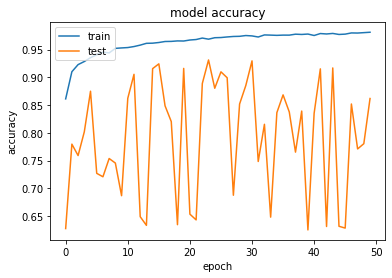

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

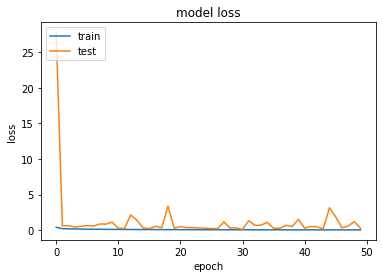

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
classifier.save_weights('pneumoniaUsingCNN_weights.h5')
with open('pneumoniaUsingCNN_architecture.json', 'w') as f:
    f.write(classifier.to_json())

In [ ]:
# Load Weights + Architecture
with open('pneumoniaUsingCNN_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('pneumoniaUsingCNN_weights.h5')

In [ ]:
#compiling the cnn
loaded_model.compile(optimizer='rmsprop' , loss='binary_crossentropy',metrics=['accuracy'])

loaded_model.evaluate_generator(training_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
loaded_model.evaluate_generator(test_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
print(loaded_model.metrics_names)

20/20 [==============================] - 4s 195ms/step
['loss', 'accuracy']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 Classification report 
              precision    recall  f1-score   support

           0       0.51      0.41      0.46      1000
           1       0.51      0.60      0.55      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000



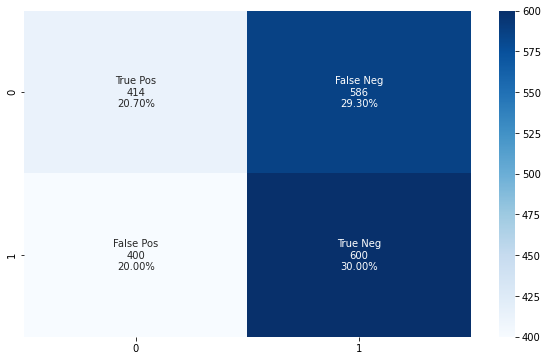

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# test_set.classes

preds = classifier.predict(test_set)
cm = confusion_matrix(test_set.classes, np.round(preds))
#print(cm)

# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# cnf_matrix=confusion_matrix(test_set.classes, y_pred)

cnf_report=classification_report(test_set.classes, np.round(preds))
print(" Classification report ")
print(cnf_report)

group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()